<a href="https://www.kaggle.com/code/alsayedhamdy/disaster-tweets-analysis-and-solution?scriptVersionId=107075013" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Hello!**
> **I'm just here to make things easier on you, I'm trying to help you to start your first natural language processing project, so just enjoy this notebook and try to start your own!**

# **What is NLP?**
The field of study that focuses on the interactions between human language and computers is called natural language processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics

“Natural Language Processing is a field that covers computer understanding and manipulation of human language, and it’s ripe with possibilities for newsgathering, Anthony Pesce says in Natural Language Processing in the kitchen. “You usually hear about it in the context of analyzing large pools of legislation or other document sets, attempting to discover patterns or root out corruption.”
![](https://miro.medium.com/max/960/0*xLRsbQ02J7sQpNNy)

# **NLP tools**

📌 Python and the Natural Language Toolkit (NLTK)
The Python programing language provides a wide range of tools and libraries for attacking specific NLP tasks. Many of these are found in the Natural Language Toolkit, or NLTK, an open source collection of libraries, programs, and education resources for building NLP programs.

The NLTK includes libraries for many of the NLP tasks listed above, plus libraries for subtasks, such as sentence parsing, word segmentation, stemming and lemmatization (methods of trimming words down to their roots), and tokenization (for breaking phrases, sentences, paragraphs and passages into tokens that help the computer better understand the text). It also includes libraries for implementing capabilities such as semantic reasoning, the ability to reach logical conclusions based on facts extracted from text.

Statistical NLP, machine learning, and deep learning
The earliest NLP applications were hand-coded, rules-based systems that could perform certain NLP tasks, but couldn't easily scale to accommodate a seemingly endless stream of exceptions or the increasing volumes of text and voice data.

Enter statistical NLP, which combines computer algorithms with machine learning and deep learning models to automatically extract, classify, and label elements of text and voice data and then assign a statistical likelihood to each possible meaning of those elements. Today, deep learning models and learning techniques based on convolutional neural networks (CNNs) and recurrent neural networks (RNNs) enable NLP systems that 'learn' as they work and extract ever more accurate meaning from huge volumes of raw, unstructured, and unlabeled text and voice data sets. 

# **NLP techniques**

**The top 7 techniques Natural Language Processing (NLP) uses to extract data from text are:**

1. Sentiment Analysis
2. Named Entity Recognition
3. Summarization
4. Topic Modeling
5. Text Classification
6. Keyword Extraction
7. Lemmatization and stemming

**And then you can use these techniques to start using the data you already extracted:**

![](https://www.researchgate.net/publication/355699418/figure/fig5/AS:1139143656652802@1648604420065/Taxonomy-of-NLP-techniques-with-algorithms-used-in-Nepali-language-processing.png)

**So, let's start our code! maybe that will help you to gain more skills:**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import nltk
import re
import string
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
from gensim.utils import tokenize

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Importing the data
train_data = pd.read_csv('../input/nlp-getting-started/train.csv')
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')

# **Data understanding**

In [4]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [8]:
train_data.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [9]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


> **📌After we understood the data and checked the columns, shape, and everything. Now let's do the EDA and analysis so we can view the data with more understandable visuals**

# **EDA**

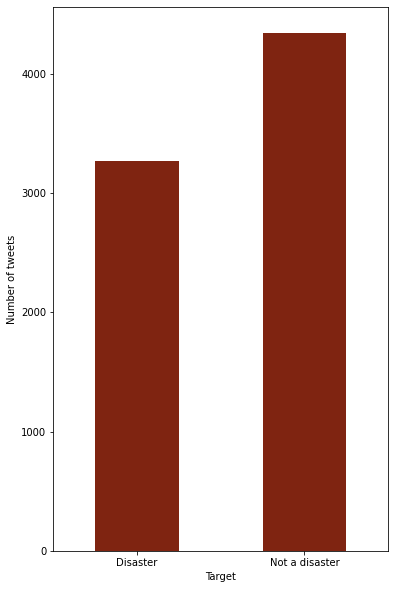

In [11]:
#Visualize the data
fig, ax = plt.subplots(figsize=(6,10))
train_data['target'].value_counts(sort=False).plot(kind='bar', color='#7F2411')
x = ['Disaster', 'Not a disaster']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x, rotation=0)
plt.xlabel('Target')
plt.ylabel('Number of tweets')
plt.show()

In [12]:
#More visualization
fig = px.pie(train_data, names='target', height=600, width= 600, color_discrete_sequence=['#7F2411', '#000000'], title='Pie Chart for distribution of Tweets')
fig.update_traces(textfont_size=15)
fig.show()

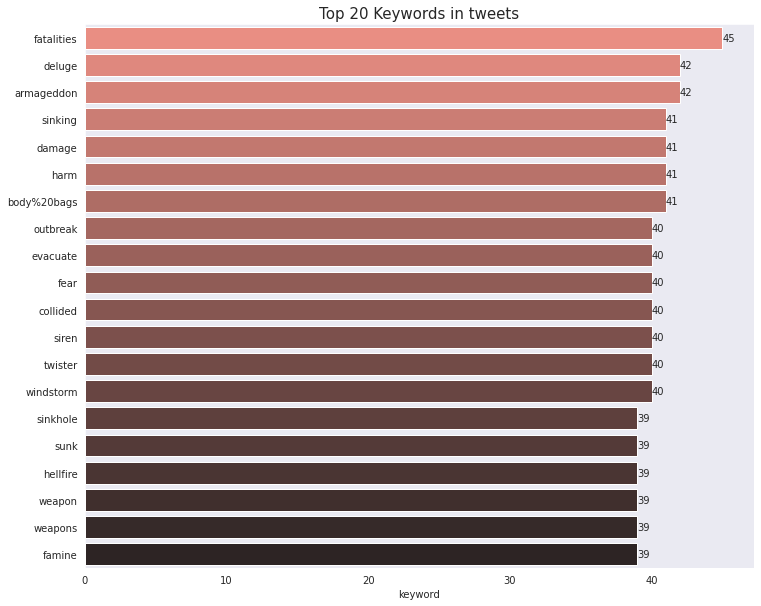

In [13]:
#Visualizing the keywords
sns.set_style('dark')
fig,axes = plt.subplots(figsize=(12,10))

top_keywords=train_data['keyword'].value_counts()[:20]
ax = sns.barplot(y=top_keywords.index, x=top_keywords, palette='dark:salmon_r',data=train_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 20 Keywords in tweets',fontsize=15)
plt.show()

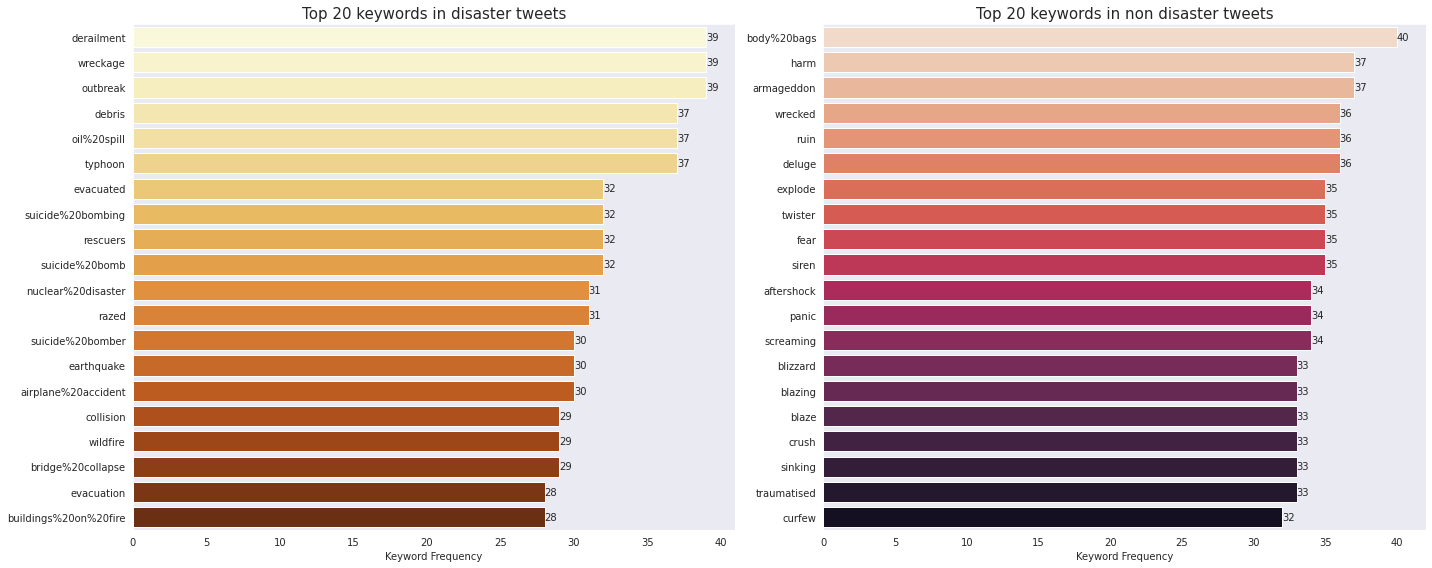

In [14]:
#Visualizing the key words in the disaster and non disaster keywords
disaster_keywords = train_data.loc[train_data['target'] == 1]['keyword'].value_counts()
non_disaster_keywords = train_data.loc[train_data['target'] == 0]['keyword'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
ax1 = sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="YlOrBr")
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Top 20 keywords in disaster tweets',fontsize=15)
ax[0].set_xlabel('Keyword Frequency')

ax2 = sns.barplot(y=non_disaster_keywords[0:20].index, x= non_disaster_keywords[0:20], orient='h', ax=ax[1], palette="rocket_r")
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Top 20 keywords in non disaster tweets',fontsize=15)
ax[1].set_xlabel('Keyword Frequency')


plt.tight_layout()
plt.show()

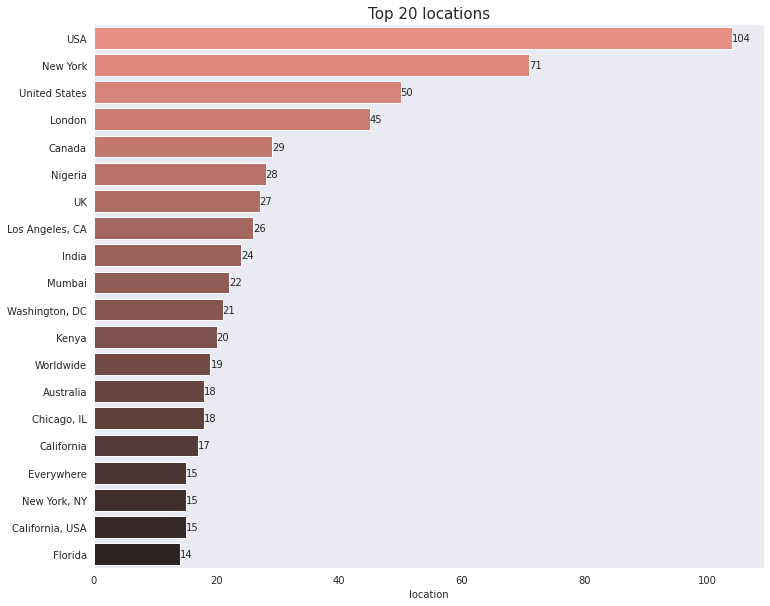

In [15]:
fig,axes = plt.subplots(figsize=(12,10))

top_location=train_data['location'].value_counts()[:20]
ax = sns.barplot(y=top_location.index, x=top_location, palette='dark:salmon_r',data=train_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 20 locations',fontsize=15)
plt.show()

Text(0, 0.5, 'Thickness')

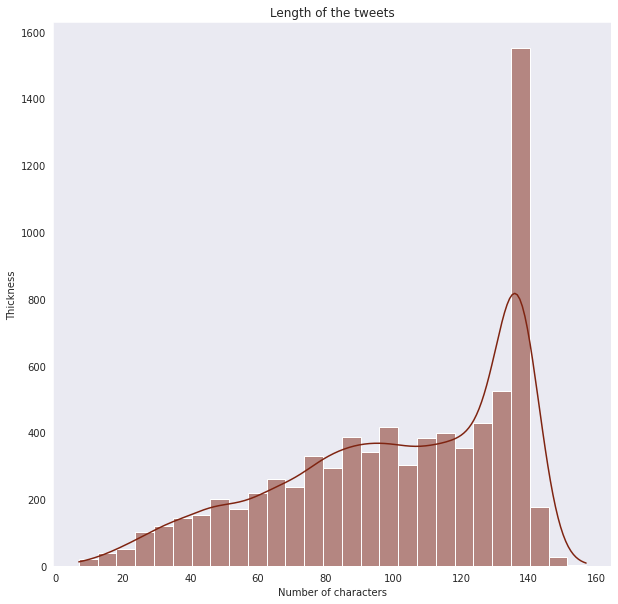

In [16]:
train_data['length'] = train_data['text'].apply(len)
#Visualize the length of the tweets
plt.figure(figsize=(10, 10))
sns.histplot(train_data['length'], kde=True, color='#7F2411')
plt.title('Length of the tweets')
plt.xlabel('Number of characters')
plt.ylabel('Thickness')

> **📌Now we are ready to do some data preprocessing so we can clear everything and get prepared for the model evaluation**

# **Data preprocessing**

In [17]:
train_data

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [18]:
#Location and the ID in the data will not affect our process so we will drop it
train_data = train_data.drop(['location'], axis=1)
train_data = train_data.drop(['id'], axis=1)

In [19]:
#And now let's handle the missing values
train_data = train_data.dropna()

In [20]:
train_data

,keyword,text,target,length
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,ablaze,We always try to bring the heavy. #metal #RT h...,0,67
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,ablaze,Crying out for more! Set me ablaze,0,34
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...
7578,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0,48
7579,wrecked,Three days off from work and they've pretty mu...,0,107
7580,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93
7581,wrecked,@engineshed Great atmosphere at the British Li...,0,104


In [21]:
#Let's check the missing values
train_data.isna().sum()

keyword    0
text       0
target     0
length     0
dtype: int64

In [22]:
#Now we will reset the index so we will back to count from the 0
train_data.reset_index(inplace=True)
train_data

,index,keyword,text,target,length
0,31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
1,32,ablaze,We always try to bring the heavy. #metal #RT h...,0,67
2,33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
3,34,ablaze,Crying out for more! Set me ablaze,0,34
4,35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...
7547,7578,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0,48
7548,7579,wrecked,Three days off from work and they've pretty mu...,0,107
7549,7580,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93
7550,7581,wrecked,@engineshed Great atmosphere at the British Li...,0,104


In [23]:
#Let's split the data to X and y
X = train_data['text']
y = train_data['target']

> **📌Now we will clean the text**

In [24]:
stop_words = set(stopwords.words('english'))
ps = SnowballStemmer('english')
#Let's make a function to finish all the cleaning process
def clean_data(text):
    #Removing URLs
    text = re.sub('http\S+\s*', ' ', text)
    #Removing RT and cc
    text = re.sub('RT|cc', ' ', text)
    #Removing digits
    text = re.sub(r'\d+', '', text)
    #Removing hashtags
    text = re.sub('#\S+', '', text)
    #Removing mentions and E-mails
    text = re.sub('@\S+', '  ', text) 
    #Removing punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) 
    #Replacing non-ASCII characters with a single space
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    #Removing extra whitespace
    text = re.sub('\s+', ' ', text)
    #Making the text in lowercase
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    #Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in stop_words])
    #Stemming
    text = " ".join([ps.stem(word) for word in text.split()])
    return text

#And now let's apply this function to our text
X = X.apply(lambda x: clean_data(x))
X

0                                   wholesal market ablaz
1                                   alway tri bring heavi
2                   break news nigeria flag set ablaz aba
3                                           cri set ablaz
4                     plus side look sky last night ablaz
                              ...                        
7547                                                wreck
7548    three day work pretti much wreck hahaha shouto...
7549                  cramer iger word wreck disney stock
7550    great atmospher british lion gig tonight hear ...
7551             cramer iger word wreck disney stock cnbc
Name: text, Length: 7552, dtype: object

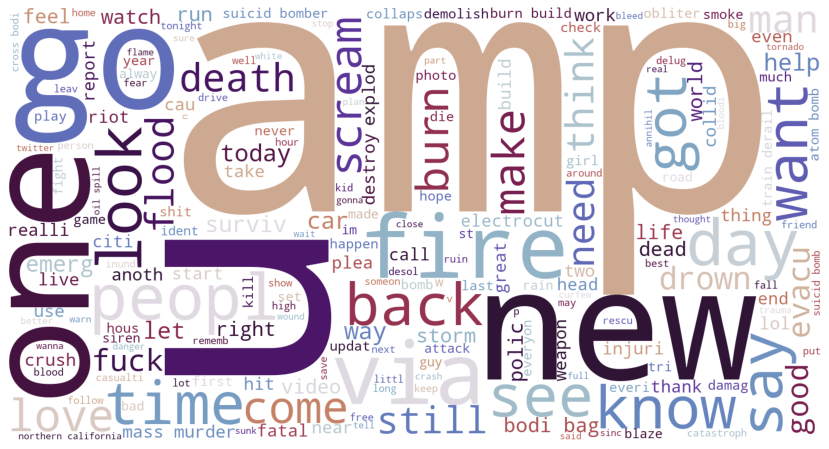

In [25]:
#Yup! And now all the text is clean!
wordcloud = WordCloud(background_color='white', 
                      max_words=200,
                      width=1500, 
                      height=800, colormap='twilight').generate(' '.join(X))

plt.figure(figsize=(32,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> **Now our text is clean enough, now let's start our vectorization process**

In [26]:
#Now we have our X vectorized
vectorizer = TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(X)
X = X.toarray()
X.shape

(7552, 6000)

# **Modeling**

In [27]:
#Let's start with the train test split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [28]:
#Let's build our model
model = LogisticRegression()
#Now we will fit it to our training data
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#Now let's evaluate the model on the test data
predicted = model.predict(X_test)

#And these are our results!
accuracy = metrics.accuracy_score(predicted, y_test)
print("Test accuracy: ", accuracy)
print(metrics.classification_report(y_test, predicted, target_names=["0", "1"]))
print("Test F-scoare: ", metrics.f1_score(y_test, predicted))

Test accuracy:  0.799470549305096
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.82      0.67      0.74       637

    accuracy                           0.80      1511
   macro avg       0.81      0.78      0.79      1511
weighted avg       0.80      0.80      0.80      1511

Test F-scoare:  0.7367506516072979


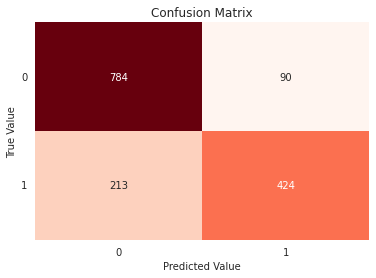

In [30]:
# Plotting confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

# **Processing Kaggle test data**

In [31]:
X_data_test = test_data['text']

In [32]:
X_data_test

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [33]:
X_data_test = X_data_test.apply(lambda x: clean_data(x))
X_data_test

0                                happen terribl car crash
1                     heard differ citi stay safe everyon
2       forest fire spot pond gees flee across street ...
3                                         apocalyps light
4                      typhoon soudelor kill china taiwan
                              ...                        
3258         ea hquak safeti los angel safeti fasten xrwn
3259    storm ri wors last hurrican citi amp other har...
3260                            green line derail chicago
3261                  meg issu hazard weather outlook hwo
3262                             activ municip emerg plan
Name: text, Length: 3263, dtype: object

In [34]:
X_data_test = vectorizer.fit_transform(X_data_test)
X_data_test = X_data_test.toarray()

In [35]:
final_prediction = model.predict(X_data_test)
final_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
id_col_test = test_data['id']

output_for_sub = pd.DataFrame(columns=['target'])

output_for_sub.insert(0, 'id', id_col_test)

output_for_sub

,id,target
0,0,NaN
1,2,NaN
2,3,NaN
3,9,NaN
4,11,NaN
...,...,...
3258,10861,NaN
3259,10865,NaN
3260,10868,NaN
3261,10874,NaN


In [37]:
output_for_sub['target'] = final_prediction
output_for_sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,0


In [38]:
output_for_sub.to_csv('Disaster Tweets.csv', index=False)